Chủ đề T4: **Lọc các phân tử tuân thủ quy tắc Lipinski** là một bước rất quan trọng trong sàng lọc tiền lâm sàng để xác định các phân tử có tiềm năng trở thành thuốc uống. Dưới đây là phần hướng dẫn song ngữ kèm theo phân tích và 5 ví dụ mã SQL + Python:

---

## 🧪 Topic T4 – Filtering Molecules that Comply with Lipinski's Rule of Five

### 🎯 Mục tiêu / Objective:

**Lọc ra 100 phân tử từ ChEMBL 35** có dữ liệu SMILES hợp lệ và thỏa mãn quy tắc Lipinski (Ro5), sử dụng RDKit để tính các đặc trưng.

---

## 📖 1. Giới thiệu quy tắc Lipinski – Lipinski’s Rule of Five

**EN**: Lipinski's rule helps identify drug-like molecules based on:

* Molecular weight < 500
* LogP < 5
* H-bond donors ≤ 5
* H-bond acceptors ≤ 10

**VI**: Quy tắc này giúp xác định các phân tử có khả năng hấp thu tốt qua đường uống, gồm:

* Trọng lượng phân tử < 500
* LogP (độ tan trong lipid) < 5
* Số nhóm cho liên kết hydro (H-donors) ≤ 5
* Số nhóm nhận liên kết hydro (H-acceptors) ≤ 10

---

## 🧠 2. Hướng dẫn phân tích – Step-by-step Analysis

### ✅ Step 1: SQL – Trích xuất SMILES từ ChEMBL 35

```sql
-- File: T4_1_extract_smiles.sql
SELECT md.chembl_id, cs.canonical_smiles
FROM molecule_dictionary md
JOIN compound_structures cs ON md.molregno = cs.molregno
WHERE cs.canonical_smiles IS NOT NULL
LIMIT 100;
```

### ✅ Step 2: Python – Tính Lipinski descriptors với RDKit

```python
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
import os

base_path = ".."
data_path = os.path.join(base_path, "data", "T4_lipinski_raw.csv")
df = pd.read_csv(data_path)

def compute_lipinski(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return {
            'MolWt': Descriptors.MolWt(mol),
            'LogP': Descriptors.MolLogP(mol),
            'HDonors': Descriptors.NumHDonors(mol),
            'HAcceptors': Descriptors.NumHAcceptors(mol)
        }
    return None

desc_list = df['canonical_smiles'].apply(compute_lipinski)
desc_df = pd.DataFrame(desc_list.tolist())
df_lipinski = pd.concat([df, desc_df], axis=1)

# Filter by Lipinski's Rule
lipinski_df = df_lipinski.query("MolWt < 500 and LogP < 5 and HDonors <= 5 and HAcceptors <= 10")
lipinski_df.to_csv(os.path.join(base_path, "data", "T4_lipinski_filtered.csv"), index=False)
```

---

## 📊 3. Các ví dụ SQL & Python – Sample Scripts

### 🔹 Example 1 – Lấy SMILES hợp lệ

```sql
SELECT chembl_id, canonical_smiles
FROM compound_structures
WHERE canonical_smiles IS NOT NULL
LIMIT 100;
```

### 🔹 Example 2 – Tính descriptors RDKit

```python
from rdkit.Chem import Crippen
Descriptors.MolLogP(mol)  # Tính LogP
```

### 🔹 Example 3 – Lọc phân tử có H-donor > 5

```python
df[df['HDonors'] > 5]
```

### 🔹 Example 4 – Lọc theo cả 4 điều kiện Lipinski

```python
df.query("MolWt < 500 and LogP < 5 and HDonors <= 5 and HAcceptors <= 10")
```

### 🔹 Example 5 – Thêm cột `Lipinski_Valid`

```python
df['Lipinski_Valid'] = df.apply(
    lambda row: all([
        row['MolWt'] < 500,
        row['LogP'] < 5,
        row['HDonors'] <= 5,
        row['HAcceptors'] <= 10
    ]), axis=1)
```

---

## 📁 File structure:

* SQL export: `../data/T4_lipinski_raw.csv`
* Filtered output: `../data/T4_lipinski_filtered.csv`
* Notebook: `notebook/T4_1_lipinski_filter.ipynb`

---

Bạn cần mình tạo sẵn file notebook `.ipynb` hoặc file SQL mẫu? Hoặc muốn thêm phần trực quan hóa biểu đồ phân bố?


In [9]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
import os
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

base_path = ".."
data_path = os.path.join(base_path, "data", "T4_lipinski_raw.csv")
df = pd.read_csv(data_path)

def compute_lipinski(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return {
            'MolWt': Descriptors.MolWt(mol),
            'LogP': Descriptors.MolLogP(mol),
            'HDonors': Descriptors.NumHDonors(mol),
            'HAcceptors': Descriptors.NumHAcceptors(mol)
        }
    return None

desc_list = df['canonical_smiles'].apply(compute_lipinski)
desc_df = pd.DataFrame(desc_list.tolist())
df_lipinski = pd.concat([df, desc_df], axis=1)

# Filter by Lipinski's Rule
lipinski_df = df_lipinski.query("MolWt < 500 and LogP < 5 and HDonors <= 5 and HAcceptors <= 10")
lipinski_df.to_csv(os.path.join(base_path, "data", "T4_lipinski_filtered.csv"), index=False)
lipinski_df

,chembl_id,canonical_smiles,MolWt,LogP,HDonors,HAcceptors
0,CHEMBL6329,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccccc1Cl,341.754,2.11362,1,5
1,CHEMBL6328,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(C#N)cc1,332.319,1.33190,1,6
2,CHEMBL265667,Cc1cc(-n2ncc(=O)[nH]c2=O)cc(C)c1C(O)c1ccc(Cl)cc1,357.797,2.27274,2,5
3,CHEMBL6362,Cc1ccc(C(=O)c2ccc(-n3ncc(=O)[nH]c3=O)cc2)cc1,307.309,1.46022,1,5
4,CHEMBL267864,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(Cl)cc1,341.754,2.11362,1,5
...,...,...,...,...,...,...
92,CHEMBL6200,c1cncc([C@@H]2CCCN2)c1,148.209,1.50610,1,2
96,CHEMBL6346,O=C(C1CCCCN1)N1CCN(Cc2cccnc2)CC1,288.395,0.86790,1,4
97,CHEMBL414181,c1cncc(CN2CCN(C[C@@H]3CCCN3)CC2)c1,260.385,0.95120,1,4
98,CHEMBL6334,c1cc(CN2CCN(C[C@@H]3CCCN3)CC2)ccn1,260.385,0.95120,1,4


Dưới đây là hướng dẫn trực quan hóa biểu đồ phân bố các thông số trong **quy tắc Lipinski** từ file `T4_lipinski_filtered.csv`, sử dụng `matplotlib` và `seaborn`.

---

## 📊 Trực quan hóa – Visualization of Lipinski Parameters

### ✅ Python Code – T4\_2\_visualize\_lipinski.ipynb

```python
# 📁 Tệp notebook: notebook/T4_2_visualize_lipinski.ipynb

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Load data
base_path = ".."
data_path = os.path.join(base_path, "data", "T4_lipinski_filtered.csv")
df = pd.read_csv(data_path)

# ✅ Cấu hình hiển thị
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# ✅ List các thông số Lipinski
lipinski_columns = ['MolWt', 'LogP', 'HDonors', 'HAcceptors']

# 🔁 Lặp qua từng đặc trưng để vẽ biểu đồ
for col in lipinski_columns:
    plt.figure()
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"📊 Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    
    # Lưu hình
    fig_path = os.path.join(base_path, "images", f"T4_dist_{col}.png")
    plt.savefig(fig_path, dpi=300)
    plt.show()
```

---

### 📁 Cấu trúc lưu hình

* Hình được lưu tại: `../images/T4_dist_MolWt.png`, `T4_dist_LogP.png`, v.v...

---

## 📌 Gợi ý cải tiến

Bạn có thể:

* So sánh phân bố trước và sau lọc Lipinski bằng overlay histograms
* Thêm biểu đồ scatter để xem mối tương quan, ví dụ:

```python
sns.scatterplot(data=df, x='MolWt', y='LogP', hue='HDonors', size='HAcceptors')
```

---

Bạn muốn mình tạo luôn file `T4_2_visualize_lipinski.ipynb` mẫu và gửi kèm `.zip` hoặc paste nội dung đầy đủ `.ipynb` vào đây?


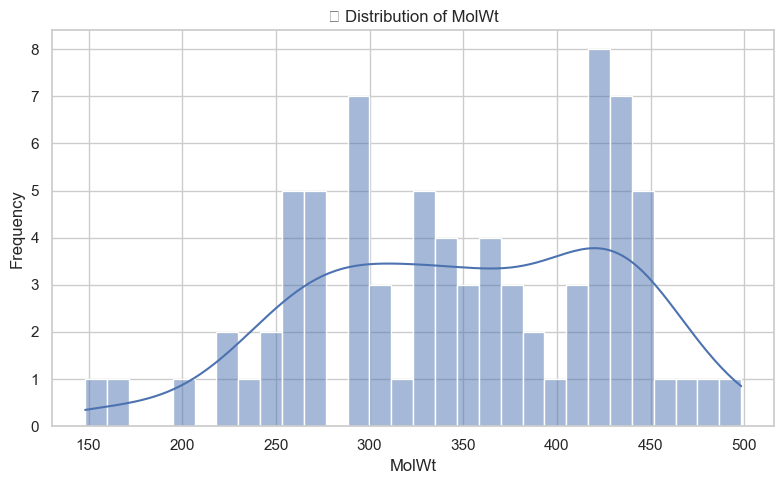

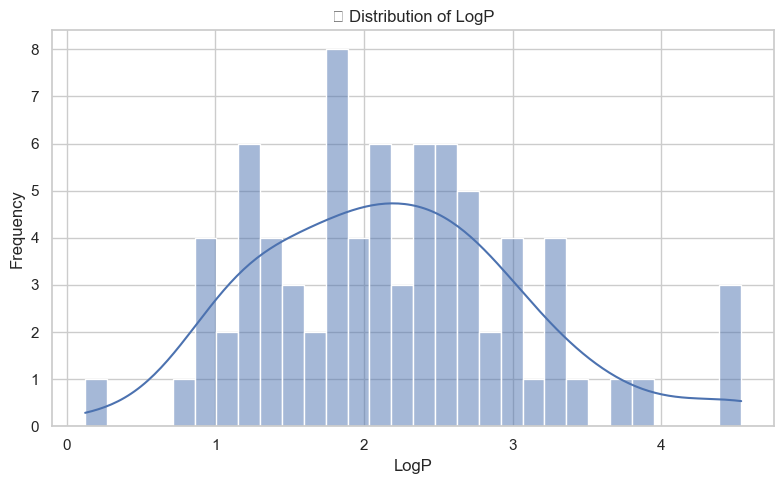

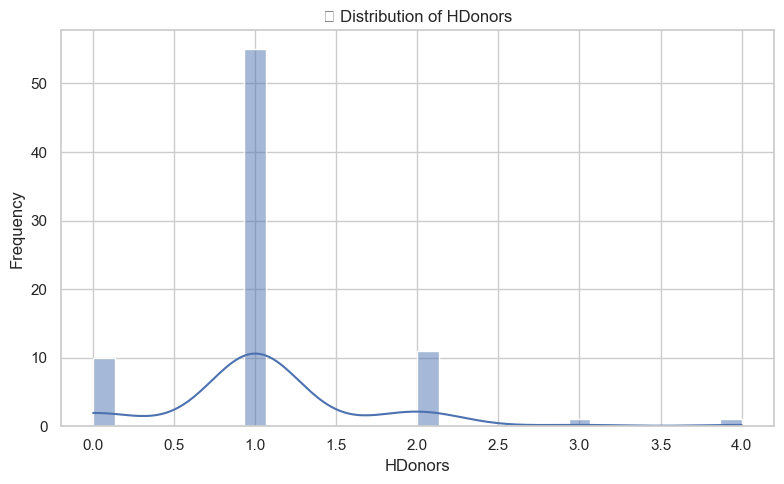

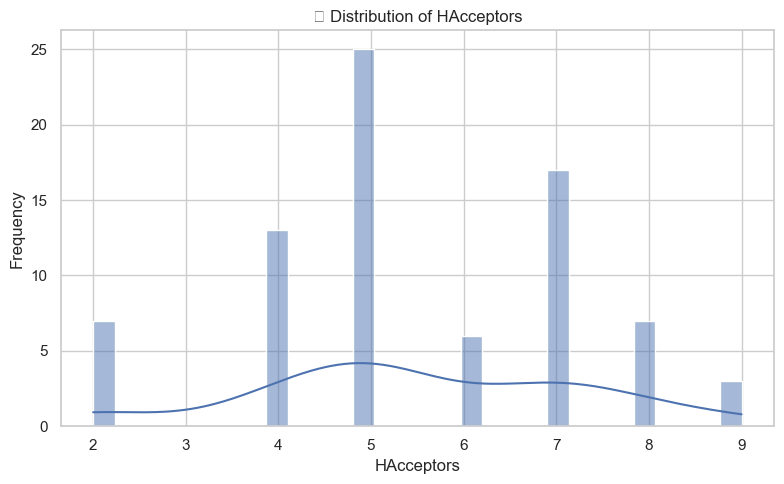

In [10]:
# 📁 Tệp notebook: notebook/T4_2_visualize_lipinski.ipynb

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Load data
base_path = ".."
data_path = os.path.join(base_path, "data", "T4_lipinski_filtered.csv")
df = pd.read_csv(data_path)

# ✅ Cấu hình hiển thị
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# ✅ List các thông số Lipinski
lipinski_columns = ['MolWt', 'LogP', 'HDonors', 'HAcceptors']

# 🔁 Lặp qua từng đặc trưng để vẽ biểu đồ
for col in lipinski_columns:
    plt.figure()
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"📊 Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    
    # Lưu hình
    fig_path = os.path.join(base_path, "images", f"T4_dist_{col}.png")
    plt.savefig(fig_path, dpi=300)
    plt.show()


<Axes: xlabel='MolWt', ylabel='LogP'>

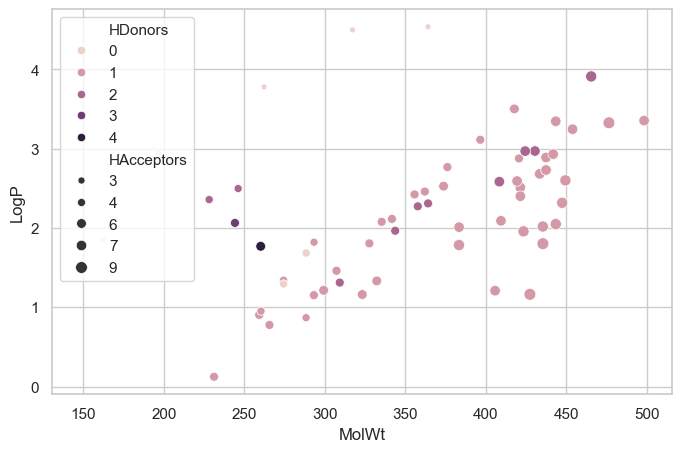

In [11]:
sns.scatterplot(data=df, x='MolWt', y='LogP', hue='HDonors', size='HAcceptors')


Dưới đây là đoạn mã đầy đủ để **so sánh phân bố trước và sau lọc Lipinski** bằng biểu đồ histogram chồng (overlay histograms), dùng `matplotlib` và `seaborn`. Mỗi biểu đồ sẽ vẽ cả dữ liệu gốc (`raw`) và sau lọc (`filtered`) với chú thích rõ ràng.

---

## ✅ Code: Overlay Histograms – So sánh phân bố

```python
# 📁 Tệp: notebook/T4_2_compare_distributions.ipynb

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Load dữ liệu
base_path = ".."
raw_path = os.path.join(base_path, "data", "T4_lipinski_raw.csv")
filtered_path = os.path.join(base_path, "data", "T4_lipinski_filtered.csv")

raw_df = pd.read_csv(raw_path)
filtered_df = pd.read_csv(filtered_path)

# ✅ Chỉ giữ các cột cần thiết
cols = ['MolWt', 'LogP', 'HDonors', 'HAcceptors']
raw_df = raw_df[cols]
filtered_df = filtered_df[cols]

# ✅ Cấu hình seaborn
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# ✅ Vẽ overlay histogram cho từng thông số
for col in cols:
    plt.figure()
    sns.histplot(raw_df[col], bins=30, color='gray', label='Before filtering', stat='density', kde=True, alpha=0.5)
    sns.histplot(filtered_df[col], bins=30, color='blue', label='After Lipinski filtering', stat='density', kde=True, alpha=0.7)
    
    plt.title(f"📊 Distribution of {col} (Before vs After Filtering)")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    
    # Lưu hình
    out_path = os.path.join(base_path, "images", f"T4_overlay_{col}.png")
    plt.savefig(out_path, dpi=300)
    plt.show()
```

---

## 📁 Cấu trúc lưu trữ

| Thư mục      | Nội dung                                              |
| ------------ | ----------------------------------------------------- |
| `../data/`   | `T4_lipinski_raw.csv`, `T4_lipinski_filtered.csv`     |
| `../images/` | `T4_overlay_MolWt.png`, `T4_overlay_LogP.png`, v.v... |
| `notebook/`  | `T4_2_compare_distributions.ipynb`                    |

---

## 📌 Gợi ý cải tiến

* Thêm đường dọc biểu thị ngưỡng Lipinski như:

```python
plt.axvline(500, color='red', linestyle='--')  # cho MolWt
```

* Gộp lại thành dashboard Streamlit nếu muốn tương tác.

---

Bạn có muốn mình tạo sẵn `.ipynb` và `.zip` đầy đủ `notebook + images + data mẫu` để bạn test ngay không?


In [12]:
from rdkit import Chem
from rdkit.Chem import Descriptors

def compute_lipinski(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return {
            'MolWt': Descriptors.MolWt(mol),
            'LogP': Descriptors.MolLogP(mol),
            'HDonors': Descriptors.NumHDonors(mol),
            'HAcceptors': Descriptors.NumHAcceptors(mol)
        }
    return {'MolWt': None, 'LogP': None, 'HDonors': None, 'HAcceptors': None}

# Apply lên file raw
raw_df = pd.read_csv("../data/T4_lipinski_raw.csv")
desc_list = raw_df['canonical_smiles'].apply(compute_lipinski)
desc_df = pd.DataFrame(desc_list.tolist())
raw_df = pd.concat([raw_df, desc_df], axis=1)

# Save lại file mới để sử dụng cho visualization
raw_df.to_csv("../data/T4_lipinski_raw_with_descriptors.csv", index=False)


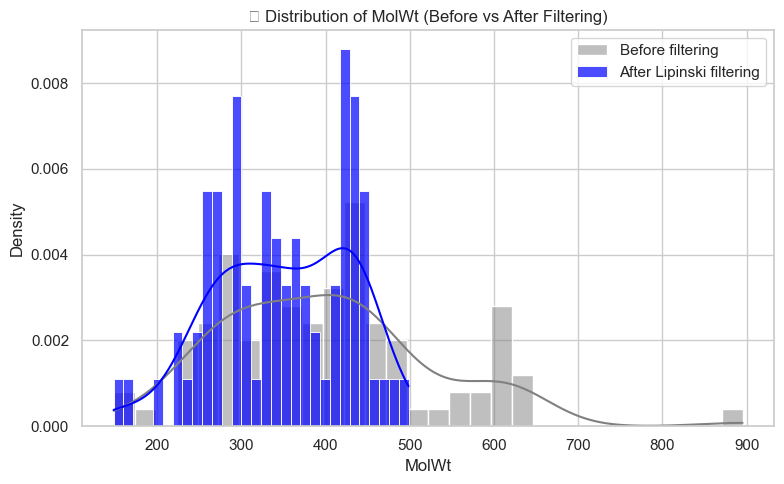

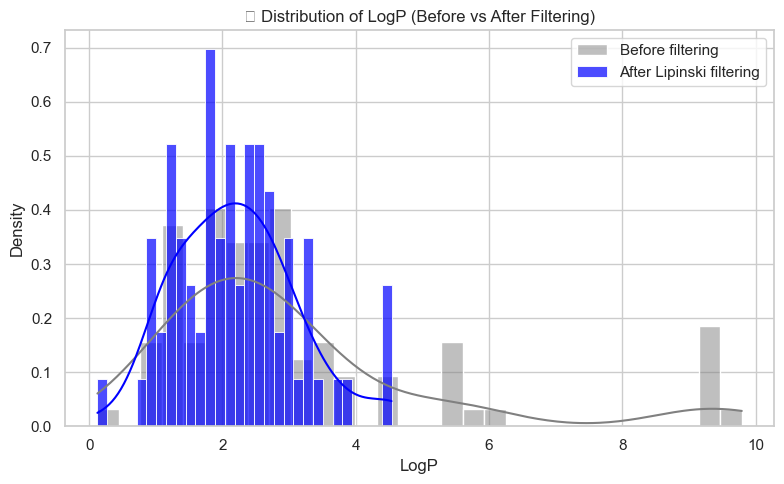

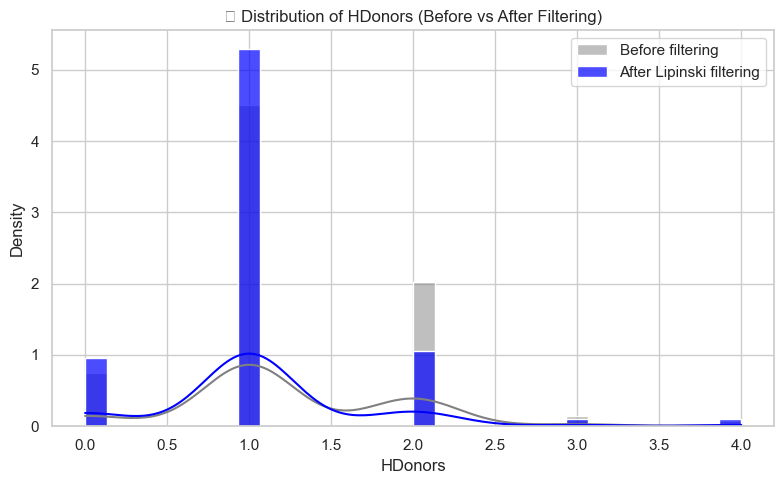

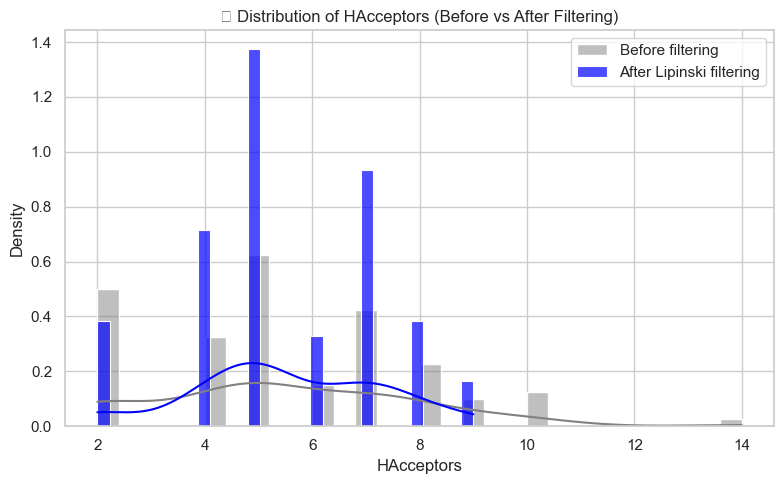

In [13]:
# 📁 Tệp: notebook/T4_2_compare_distributions.ipynb

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Load dữ liệu
base_path = ".."
# raw_path = os.path.join(base_path, "data", "T4_lipinski_raw.csv")
raw_path = os.path.join(base_path, "data", "T4_lipinski_raw_with_descriptors.csv")
filtered_path = os.path.join(base_path, "data", "T4_lipinski_filtered.csv")

raw_df = pd.read_csv(raw_path)
filtered_df = pd.read_csv(filtered_path)

# ✅ Chỉ giữ các cột cần thiết
cols = ['MolWt', 'LogP', 'HDonors', 'HAcceptors']
raw_df = raw_df[cols]
filtered_df = filtered_df[cols]

# ✅ Cấu hình seaborn
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# ✅ Vẽ overlay histogram cho từng thông số
for col in cols:
    plt.figure()
    sns.histplot(raw_df[col], bins=30, color='gray', label='Before filtering', stat='density', kde=True, alpha=0.5)
    sns.histplot(filtered_df[col], bins=30, color='blue', label='After Lipinski filtering', stat='density', kde=True, alpha=0.7)
    
    plt.title(f"📊 Distribution of {col} (Before vs After Filtering)")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    
    # Lưu hình
    out_path = os.path.join(base_path, "images", f"T4_overlay_{col}.png")
    plt.savefig(out_path, dpi=300)
    plt.show()
